# Lab 3

* Write a python code to demonstrate the confusion matrix, accuracy, other metrics with plots in sklearn. You are allowed to use any tabular data set from kaggle. 
* Write a python code to demonstrate the use of linear regression and metrics to compute error illustrating with plots. You can try to use dataset from kaggle like student performance data set or salary and experience dataset.  
* Show the illustrations using the plots to demonstrate the probability distribution plots as per the dataset you consider?


### Universal Imports

In [1]:
# All imports necessary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

END = "\n-----------------------------------\n"
SEP = '\n\n'


### Question 1: Write a python code to demonstrate the confusion matrix, accuracy, other metrics with plots in sklearn. You are allowed to use any tabular data set from kaggle. 

#### Imports

In [2]:
# Importing the csv
df = pd.read_csv('Heart Attack.csv')

#### CSV import

In [3]:
# Importing the csv
df = pd.read_csv('Heart Attack.csv')

#### Preprocessing the data and training a classification algorithm to add a predicted label

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x[0:5], '\n\n', y[0:5])

[[6.400e+01 1.000e+00 6.600e+01 1.600e+02 8.300e+01 1.600e+02 1.800e+00
  1.200e-02]
 [2.100e+01 1.000e+00 9.400e+01 9.800e+01 4.600e+01 2.960e+02 6.750e+00
  1.060e+00]
 [5.500e+01 1.000e+00 6.400e+01 1.600e+02 7.700e+01 2.700e+02 1.990e+00
  3.000e-03]
 [6.400e+01 1.000e+00 7.000e+01 1.200e+02 5.500e+01 2.700e+02 1.387e+01
  1.220e-01]
 [5.500e+01 1.000e+00 6.400e+01 1.120e+02 6.500e+01 3.000e+02 1.080e+00
  3.000e-03]] 

 ['negative' 'positive' 'negative' 'positive' 'negative']


In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 0:-1])
x[:, 0:-1] = imputer.transform(x[:, 0:-1])
print(x[0:5], '\n\n', y[0:5])

[[6.400e+01 1.000e+00 6.600e+01 1.600e+02 8.300e+01 1.600e+02 1.800e+00
  1.200e-02]
 [2.100e+01 1.000e+00 9.400e+01 9.800e+01 4.600e+01 2.960e+02 6.750e+00
  1.060e+00]
 [5.500e+01 1.000e+00 6.400e+01 1.600e+02 7.700e+01 2.700e+02 1.990e+00
  3.000e-03]
 [6.400e+01 1.000e+00 7.000e+01 1.200e+02 5.500e+01 2.700e+02 1.387e+01
  1.220e-01]
 [5.500e+01 1.000e+00 6.400e+01 1.120e+02 6.500e+01 3.000e+02 1.080e+00
  3.000e-03]] 

 ['negative' 'positive' 'negative' 'positive' 'negative']


In [6]:
# Converting the label to binary
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 ... 1 1 1]


In [7]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train[0:5], '\n\n', x_test[0:5])

[[-1.06307571  0.70442732 -0.36785015  1.51021299  1.27611499 -0.74645772
  -0.25621934 -0.30017441]
 [-0.83982078  0.70442732  0.14276601 -0.80802274 -0.66410585  1.66321576
  -0.25951923 -0.3010221 ]
 [ 1.54156513 -1.41959287 -0.36785015  0.42836965 -1.02340601 -0.563113
  -0.25848801 -0.28237284]
 [ 1.02063696  0.70442732 -0.3474255   0.69883048 -0.30480569 -1.12624322
   5.59075723 -0.30865135]
 [ 0.12761724  0.70442732 -0.10232975  1.27838941  1.63541515 -0.73336167
  -0.28550579 -0.26880974]] 

 [[-0.20458876  0.76088591  0.16461902 -0.44596982 -0.30301682 -0.67615764
  -0.19450392 -0.31338445]
 [ 1.34100373 -1.31425748  0.01164077 -1.41689626 -2.183156   -0.84682399
  -0.22859022 -0.25843245]
 [-1.75018125  0.76088591  0.8955151  -0.1098799   0.11479189 -0.76149081
  -0.12658761 -0.31338445]
 [-0.55585978 -1.31425748 -0.24332298  0.30089667  1.08967887 -0.59082447
  -0.23269083 -0.30593334]
 [ 1.20049532 -1.31425748  0.02863835  0.82370321  0.18442667 -0.29215837
  -0.31239639 -

In [8]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)

#### Confusion matrix generation and plot

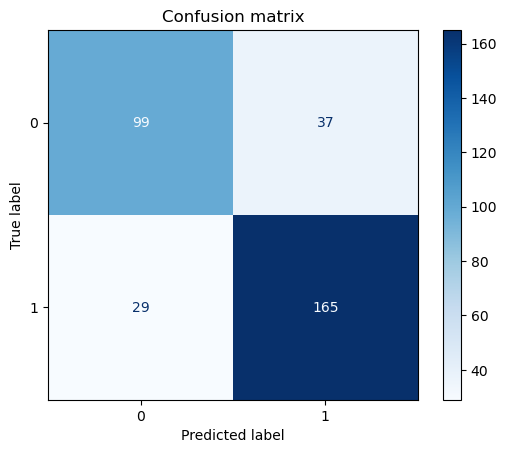

In [9]:
matrix = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(matrix)
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

#### Accuracy score

In [10]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy score is: {accuracy}")

Accuracy score is: 0.8


#### F1 score

In [11]:
f1 = f1_score(y_test, prediction)
print(f"F1 score: {f1}")

F1 score: 0.8333333333333333


#### Recall

In [12]:
recall = recall_score(y_test, prediction)
print(f"Recall: {recall}")

Recall: 0.8505154639175257


### Question 2: Write a python code to demonstrate the use of linear regression and metrics to compute error illustrating with plots. You can try to use dataset from kaggle like student performance data set or salary and experience dataset.  

#### Data import

In [13]:
students = pd.read_csv('Student_Performance.csv')
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### Preprocessing

In [14]:
# Encoding Extracurricular Activities into binary
le = LabelEncoder()
students['Extracurricular Activities'] = le.fit_transform(students['Extracurricular Activities'])
print(students.head(), end='\n\n\n')

# Checking for null values
print(students.isnull().sum())

# Separating independent from dependent variables
x = students[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = students.iloc[:, -1].values
print(SEP, x, SEP, y)

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced   

#### Modelling

Mean Squared Error: 4.039519191698852
R2 Error: 0.9888065859708454


Text(0.5, 1.0, 'Performance Index prediction')

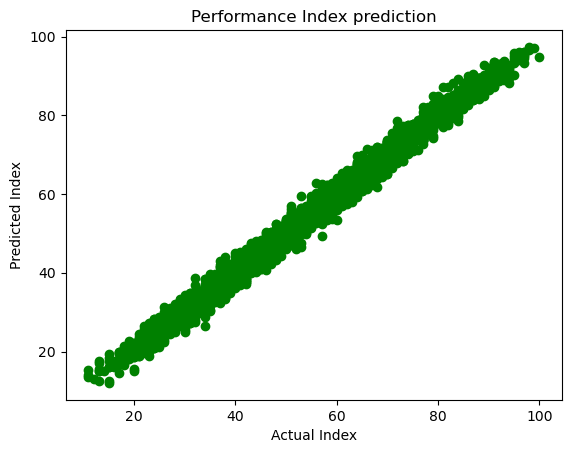

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Error: {r2_score(y_test, y_pred)}")

# Plotting the graph
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Index')
plt.ylabel('Predicted Index')
plt.title('Performance Index prediction')



### Question 3: Show the illustrations using the plots to demonstrate the probability distribution plots as per the dataset you consider?

#### Dataset import

In [16]:
students = pd.read_csv('Student_Performance.csv')
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### We will plot hours studied against sleep hours

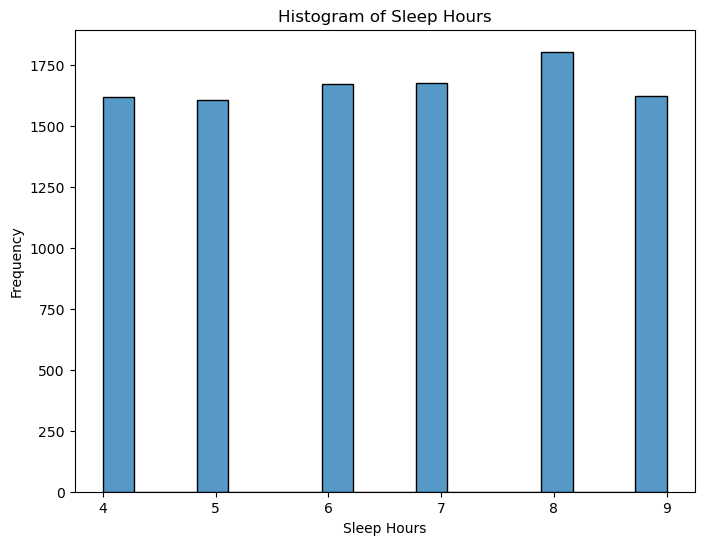

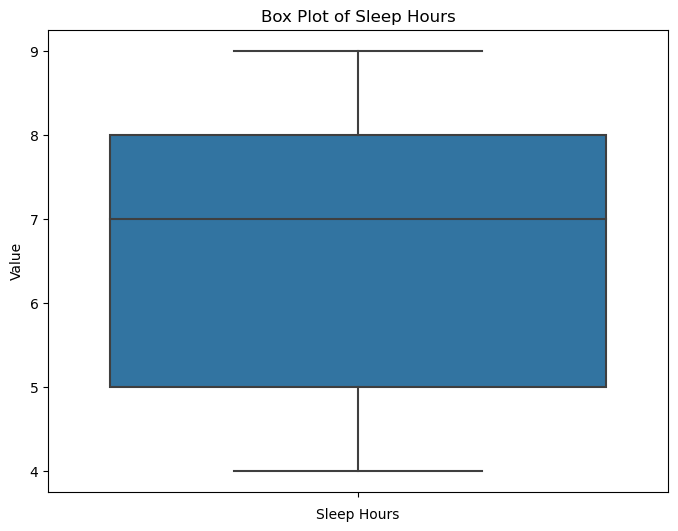

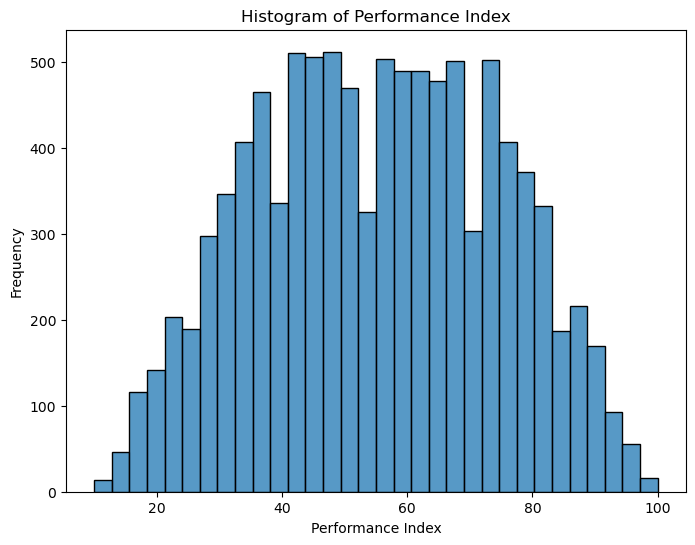

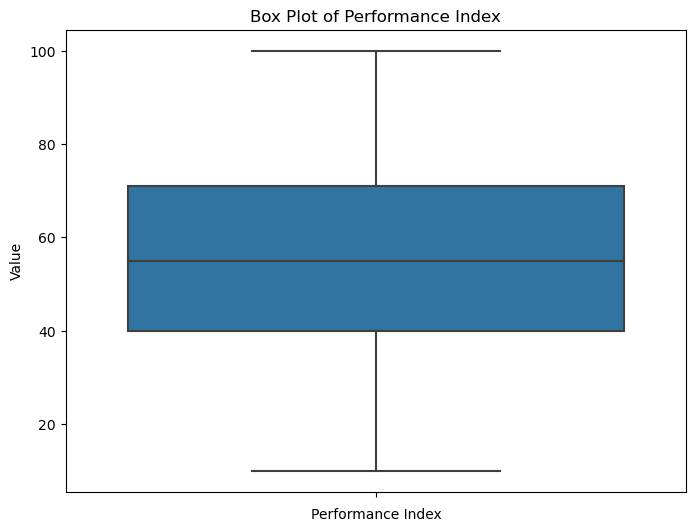

In [17]:
# Create histograms for 'Sleep Hours'
plt.figure(figsize=(8, 6))
sns.histplot(students['Sleep Hours'], kde=False)
plt.title('Histogram of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

# Create box plot for 'Sleep Hours'
plt.figure(figsize=(8, 6))
sns.boxplot(data=students, y='Sleep Hours')
plt.title('Box Plot of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Value')
plt.show()

# Create histograms for 'Performance Index'
plt.figure(figsize=(8, 6))
sns.histplot(students['Performance Index'], kde=False)
plt.title('Histogram of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

# Create box plot for 'Performance Index'
plt.figure(figsize=(8, 6))
sns.boxplot(data=students, y='Performance Index')
plt.title('Box Plot of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Value')
plt.show()